#Importing Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
import zipfile
import os

# Path to the zip files in Google Drive
zip_path = 'diabetes.zip'
# Destination folder
extract_path = '/content/'

# Unzipping
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

## Data Preprocessing

In [69]:
df = pd.read_csv('/content/diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [66]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
df.shape


(768, 9)

In [13]:
df.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
5            103      108            37             0        39.2  0.305                     65   0          1
             104      74             0              0        28.8  0.153                     48   0          1
             105      72             29             325      36.9  0.159                     28   0          1
                                                                                                            ..
2            84       50             23             76       30.4  0.968                     21   0          1
             85       65             0              0        39.6  0.930                     27   0          1
             87       0              23             0        28.9  0.773                     25   0          1
                      58             16             52       32.7  0.166                     25   0          1
17           163      72             41             114      40.9  0.817                     47   1          1
Name: count, Length: 768, dtype: int64

# Exploratory Data Analysis (EDA)

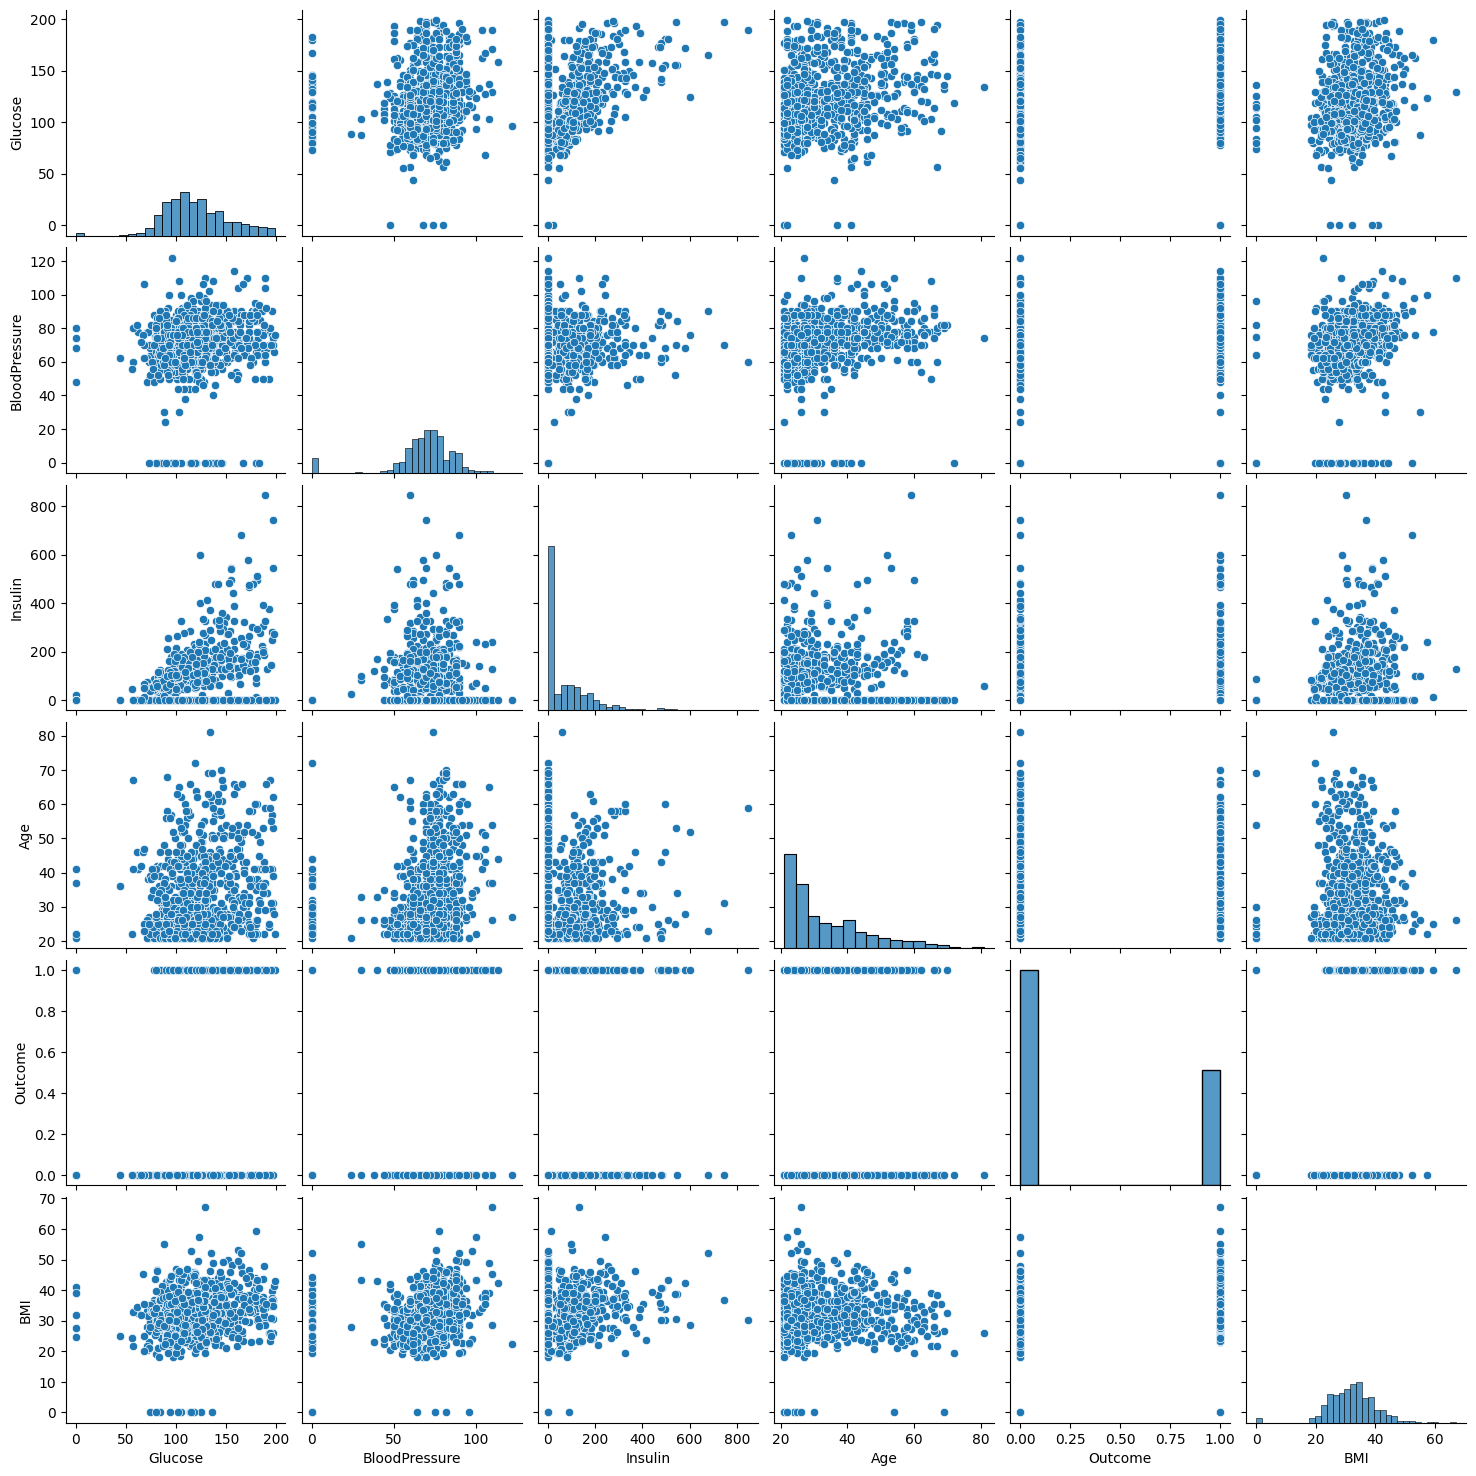

In [73]:
#pairplot
mean_col = ['Glucose','BloodPressure','Insulin','Age','Outcome','BMI']
sns.pairplot(df[mean_col])


<Axes: xlabel='BMI', ylabel='Glucose'>

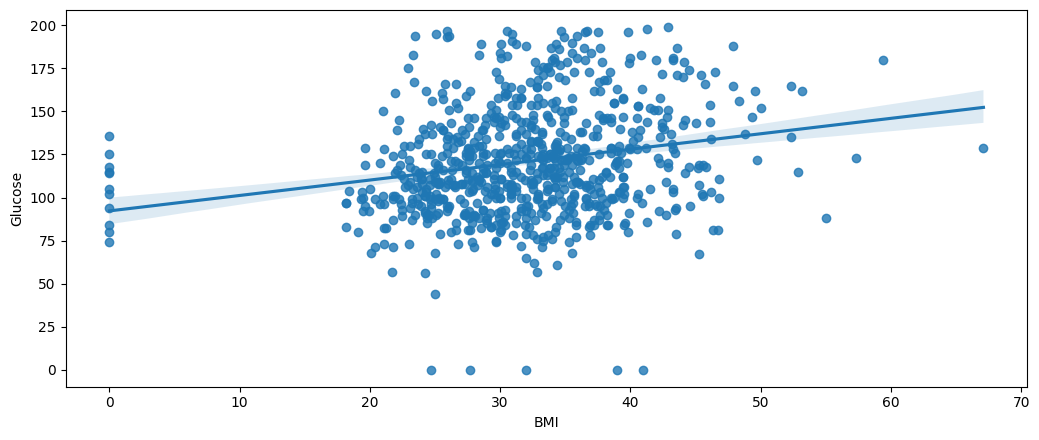

In [74]:
sns.regplot(x='BMI',y='Glucose', data=df)


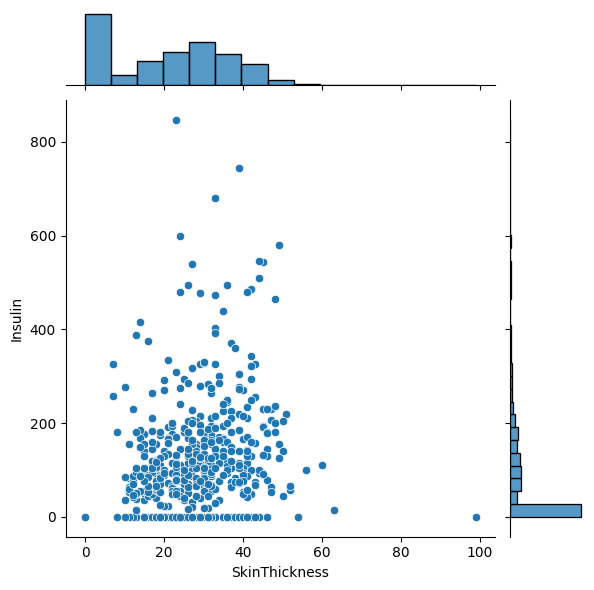

In [75]:
sns.jointplot(x='SkinThickness', y='Insulin', data=df)


In [70]:
df.corr()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


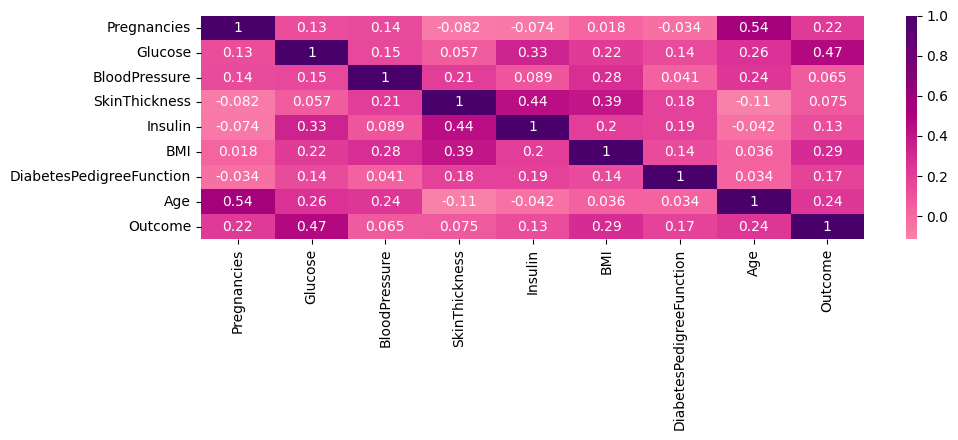

In [71]:
dataplot = sns.heatmap(df.corr(), cmap='RdPu', annot=True, center=0)


IndexError: index 8 is out of bounds for axis 0 with size 8

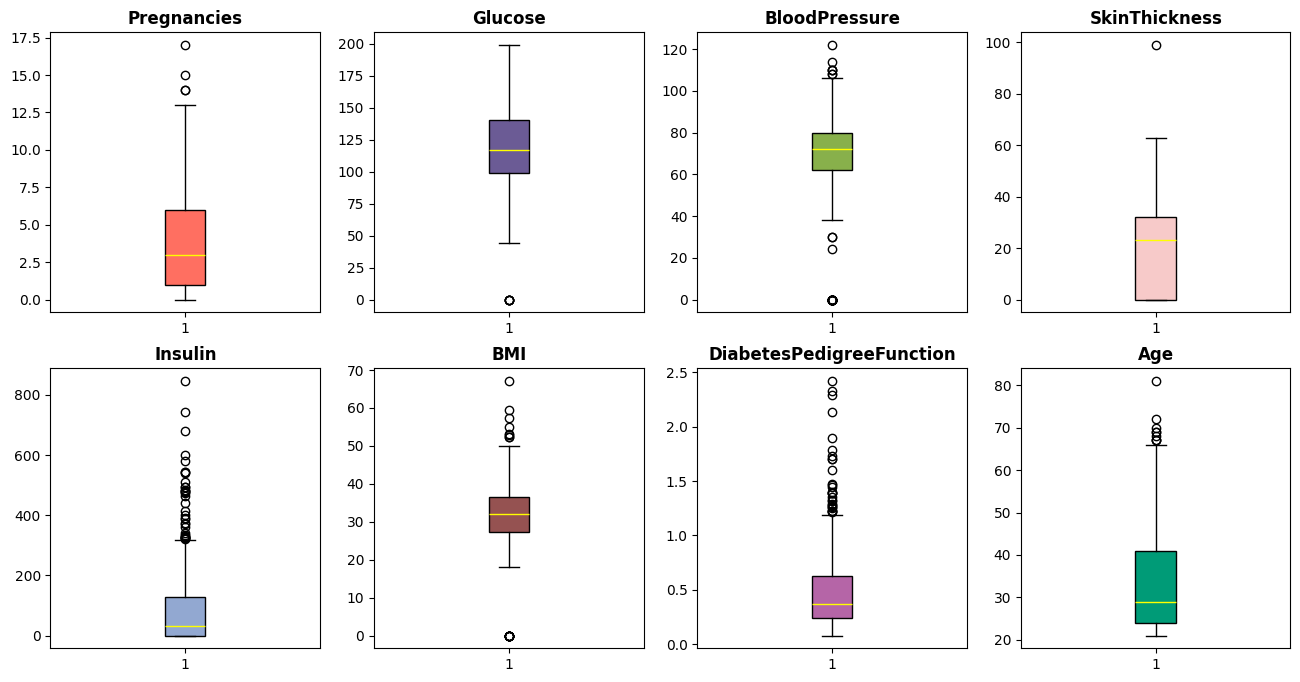

In [8]:
import matplotlib.pyplot as plt

# Define a 2x4 grid (8 features + Outcome = 9 plots, last one will be empty)
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# List of features and corresponding colors
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
            'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
box_colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9',
              '#92A8D1', '#955251', '#B565A7', '#009B77', '#DD4124']

# Plot box plots with custom styling
for i, (feature, color) in enumerate(zip(features, box_colors)):
    axes[i].boxplot(df[feature], patch_artist=True,
                    boxprops=dict(facecolor=color, color='black'),
                    whiskerprops=dict(color='black'),
                    capprops=dict(color='black'),
                    medianprops=dict(color='yellow'))
    axes[i].set_title(feature, fontsize=12, fontweight='bold')
    axes[i].tick_params(axis='y', labelsize=10)

# Remove the last empty subplot (if any)
if len(features) < len(axes):
    for i in range(len(features), len(axes)):

     fig.delaxes(axes[i])

# Add a main title and adjust layout
fig.suptitle("Distribution of Features in Diabetes Dataset", fontsize=18, y=1.05)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Display the plot
plt.show()

In [9]:
for i in range(len(df.columns)-1):
    for j in range(i+1,len(df.columns)):
        if 0.5<=df[df.columns[i]].corr(df[df.columns[j]]):
            print("We can drop either "+str(df.columns[i])+" or "+str(df.columns[j]))


We can drop either Pregnancies or Age


In [67]:
df.drop(['Pregnancies'], axis=1, inplace=True)

In [68]:
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [11]:
df.Glucose.describe()

,Glucose
count,768.000000
mean,120.894531
std,31.972618
min,0.000000
25%,99.000000
50%,117.000000
75%,140.250000
max,199.000000


# Dealing with Outliers

In [13]:
Q1 = df.Glucose.quantile(0.25)
Q3 = df.Glucose.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
df.loc[df['Glucose']<=lower_limit,'Glucose'] = np.mean(df['Glucose'])
df.loc[df['Glucose']>upper_limit, 'Glucose'] = np.mean(df['Glucose'])

<ipython-input-13-eac62b5255f4>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '120.89453125' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Glucose']<=lower_limit,'Glucose'] = np.mean(df['Glucose'])


In [14]:
Q1 = df.BloodPressure.quantile(0.25)
Q3 = df.BloodPressure.quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
df.loc[df['BloodPressure']<=lower_limit,'BloodPressure'] = np.mean(df['BloodPressure'])
df.loc[df['BloodPressure']>upper_limit,'BloodPressure'] = np.mean(df['BloodPressure'])


<ipython-input-14-05bc0d6b48d4>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '69.10546875' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['BloodPressure']<=lower_limit,'BloodPressure'] = np.mean(df['BloodPressure'])


In [15]:
Q1 = df.SkinThickness.quantile(0.25)
Q3 = df.SkinThickness.quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
df.loc[df['SkinThickness']<=lower_limit,'SkinThickness'] = np.mean(df['SkinThickness'])
df.loc[df['SkinThickness']>upper_limit,'SkinThickness'] = np.mean(df['SkinThickness'])


<ipython-input-15-db7e8323ecee>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '20.536458333333332' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['SkinThickness']<=lower_limit,'SkinThickness'] = np.mean(df['SkinThickness'])


In [16]:
Q1 = df.Insulin.quantile(0.25)
Q3 = df.Insulin.quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
df.loc[df['Insulin']<=lower_limit,'Insulin'] = np.mean(df['Insulin'])
df.loc[df['Insulin']>upper_limit,'Insulin'] = np.mean(df['Insulin'])


<ipython-input-16-1e0e27264233>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '79.79947916666667' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Insulin']<=lower_limit,'Insulin'] = np.mean(df['Insulin'])


In [17]:
Q1 = df.BMI.quantile(0.25)
Q3 = df.BMI.quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
df.loc[df['BMI']<=lower_limit,'BMI'] = np.mean(df['BMI'])
df.loc[df['BMI']>upper_limit,'BMI'] = np.mean(df['BMI'])


In [18]:
Q1 = df.DiabetesPedigreeFunction.quantile(0.25)
Q3 = df.DiabetesPedigreeFunction.quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
df.loc[df['DiabetesPedigreeFunction']<=lower_limit,'DiabetesPedigreeFunction'] = np.mean(df['DiabetesPedigreeFunction'])
df.loc[df['DiabetesPedigreeFunction']>upper_limit,'DiabetesPedigreeFunction'] = np.mean(df['DiabetesPedigreeFunction'])


In [19]:
Q1 = df.Age.quantile(0.25)
Q3 = df.Age.quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
df.loc[df['Age']<=lower_limit,'Age'] = np.mean(df['Age'])
df.loc[df['Age']>upper_limit,'Age'] = np.mean(df['Age'])


<ipython-input-19-83f02841cb99>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '33.240885416666664' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Age']<=lower_limit,'Age'] = np.mean(df['Age'])


In [20]:
Q1 = df.Outcome.quantile(0.25)
Q3 = df.Outcome.quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
df.loc[df['Outcome']<=lower_limit,'Outcome'] = np.mean(df['Outcome'])
df.loc[df['Outcome']>upper_limit,'Outcome'] = np.mean(df['Outcome'])


<ipython-input-20-99e6526bbbd3>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.3489583333333333' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Outcome']<=lower_limit,'Outcome'] = np.mean(df['Outcome'])


<Axes: title={'center': 'Outcome'}>

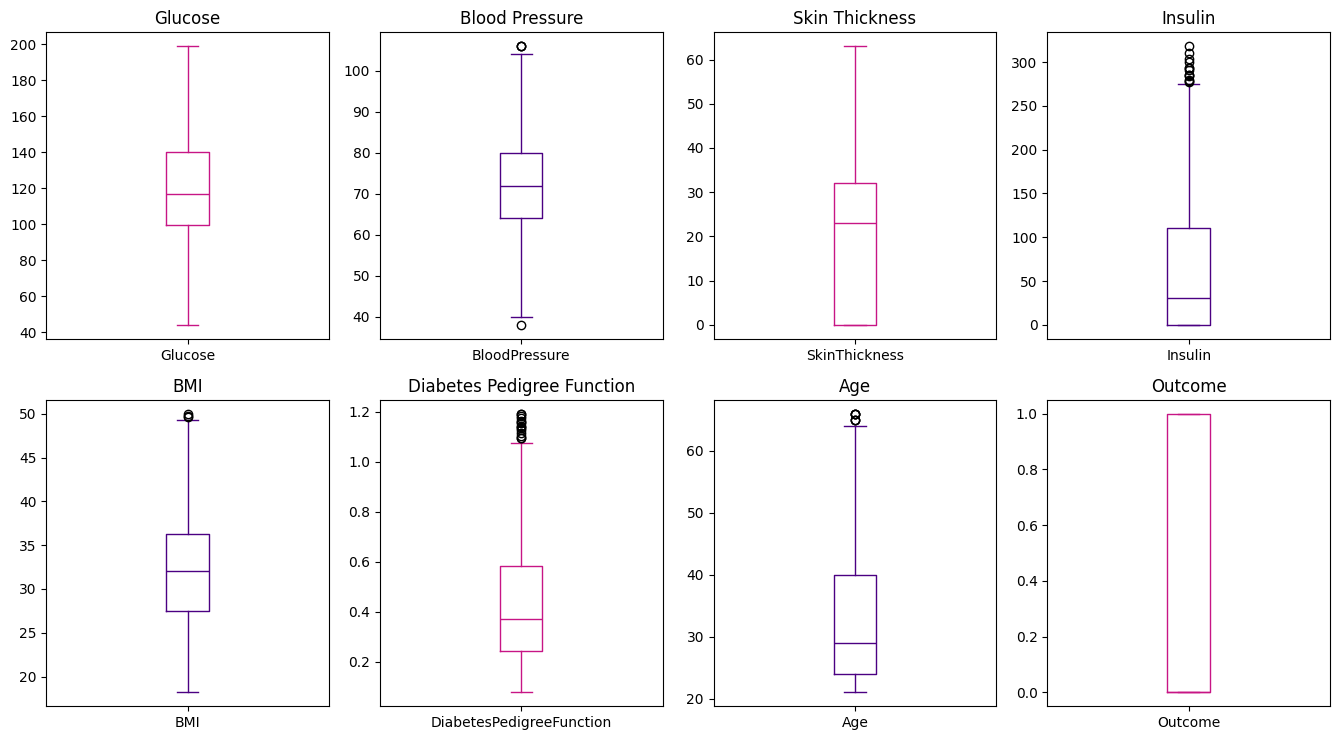

In [21]:
plt.rcParams["figure.figsize"] = [13.50, 7.50]
plt.rcParams["figure.autolayout"] = True
figure, axis = plt.subplots(2, 4)

df['Glucose'].plot.box(title="Glucose",ax=axis[0][0],color="MEDIUMVIOLETRED")
df['BloodPressure'].plot.box(title="Blood Pressure",ax=axis[0][1],color="INDIGO")
df['SkinThickness'].plot.box(title="Skin Thickness",ax=axis[0][2],color="MEDIUMVIOLETRED")
df['Insulin'].plot.box(title="Insulin",ax=axis[0][3],color="INDIGO")
df['BMI'].plot.box(title="BMI",ax=axis[1][0],color="INDIGO")
df['DiabetesPedigreeFunction'].plot.box(title="Diabetes Pedigree Function",ax=axis[1][1],color="MEDIUMVIOLETRED")
df['Age'].plot.box(title="Age",ax=axis[1][2],color="INDIGO")
df['Outcome'].plot.box(title="Outcome",ax=axis[1][3],color="MEDIUMVIOLETRED")


In [22]:
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148.0,72.0,35.0,0.0,33.6,0.627000,50.0,1.0
1,85.0,66.0,29.0,0.0,26.6,0.351000,31.0,0.0
2,183.0,64.0,0.0,0.0,23.3,0.672000,32.0,1.0
3,89.0,66.0,23.0,94.0,28.1,0.167000,21.0,0.0
4,137.0,40.0,35.0,168.0,43.1,0.471876,33.0,1.0
...,...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,0.171000,63.0,0.0
764,122.0,70.0,27.0,0.0,36.8,0.340000,27.0,0.0
765,121.0,72.0,23.0,112.0,26.2,0.245000,30.0,0.0
766,126.0,60.0,0.0,0.0,30.1,0.349000,47.0,1.0


# Data Standardization

In [23]:
df_X = df.iloc[:,[0,1,2,3,4,5,6]]
df_X


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148.0,72.0,35.0,0.0,33.6,0.627000,50.0
1,85.0,66.0,29.0,0.0,26.6,0.351000,31.0
2,183.0,64.0,0.0,0.0,23.3,0.672000,32.0
3,89.0,66.0,23.0,94.0,28.1,0.167000,21.0
4,137.0,40.0,35.0,168.0,43.1,0.471876,33.0
...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,0.171000,63.0
764,122.0,70.0,27.0,0.0,36.8,0.340000,27.0
765,121.0,72.0,23.0,112.0,26.2,0.245000,30.0
766,126.0,60.0,0.0,0.0,30.1,0.349000,47.0


In [24]:
df_Y = df['Outcome']
df_Y


,Outcome
0,1.0
1,0.0
2,1.0
3,0.0
4,1.0
...,...
763,0.0
764,0.0
765,0.0
766,1.0


In [26]:
from sklearn.preprocessing import StandardScaler # Importing the StandardScaler class from sklearn.preprocessing

scaler = StandardScaler()
df_X_scaled = pd.DataFrame(scaler.fit_transform(df_X),columns=df_X.columns)


In [27]:
df_scaled = pd.concat([df_X_scaled, df_Y], axis=1)
df_scaled


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.865276,-0.005124,0.928458,-0.815354,0.217978,0.798645,1.556957,1.0
1,-1.205989,-0.542772,0.546002,-0.815354,-0.874679,-0.328392,-0.163949,0.0
2,2.015979,-0.721988,-1.302538,-0.815354,-1.389789,0.982401,-0.073375,1.0
3,-1.074480,-0.542772,0.163545,0.399244,-0.640538,-1.079749,-1.069690,0.0
4,0.503626,-2.872582,0.928458,1.355416,1.700869,0.165203,0.017199,1.0
...,...,...,...,...,...,...,...,...
763,-0.679954,0.353308,1.757114,1.510471,0.108712,-1.063415,2.734419,0.0
764,0.010468,-0.184340,0.418516,-0.815354,0.717478,-0.373310,-0.526245,0.0
765,-0.022409,-0.005124,0.163545,0.631826,-0.937117,-0.761239,-0.254523,0.0
766,0.141977,-1.080421,-1.302538,-0.815354,-0.328351,-0.336558,1.285235,1.0


In [28]:
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148.0,72.0,35.0,0.0,33.6,0.627000,50.0,1.0
1,85.0,66.0,29.0,0.0,26.6,0.351000,31.0,0.0
2,183.0,64.0,0.0,0.0,23.3,0.672000,32.0,1.0
3,89.0,66.0,23.0,94.0,28.1,0.167000,21.0,0.0
4,137.0,40.0,35.0,168.0,43.1,0.471876,33.0,1.0
...,...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,0.171000,63.0,0.0
764,122.0,70.0,27.0,0.0,36.8,0.340000,27.0,0.0
765,121.0,72.0,23.0,112.0,26.2,0.245000,30.0,0.0
766,126.0,60.0,0.0,0.0,30.1,0.349000,47.0,1.0


In [29]:
X = df.iloc[:,:-1].values
X

array([[148.   ,  72.   ,  35.   , ...,  33.6  ,   0.627,  50.   ],
       [ 85.   ,  66.   ,  29.   , ...,  26.6  ,   0.351,  31.   ],
       [183.   ,  64.   ,   0.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [121.   ,  72.   ,  23.   , ...,  26.2  ,   0.245,  30.   ],
       [126.   ,  60.   ,   0.   , ...,  30.1  ,   0.349,  47.   ],
       [ 93.   ,  70.   ,  31.   , ...,  30.4  ,   0.315,  23.   ]])

In [30]:
Y = df.iloc[:,-1].values
Y


array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0.

##Train-Test Data Split

In [33]:
from sklearn.model_selection import train_test_split # Importing the train_test_split function

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.66, shuffle=True)


#Implementing **Models**

In [32]:
from sklearn import metrics
from sklearn.metrics import classification_report


### Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
Y_pred = log_reg.predict(X_test)
target_names = ['non-diabetes', 'diabetes']
print(classification_report(Y_test, Y_pred, target_names=target_names))


              precision    recall  f1-score   support

non-diabetes       0.79      0.86      0.82       167
    diabetes       0.71      0.59      0.64        95

    accuracy                           0.76       262
   macro avg       0.75      0.73      0.73       262
weighted avg       0.76      0.76      0.76       262



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### K-Nearest Neighbour

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
target_names = ['non-diabetes', 'diabetes']
print(classification_report(Y_test, Y_pred, target_names=target_names))

              precision    recall  f1-score   support

non-diabetes       0.74      0.80      0.77       167
    diabetes       0.59      0.51      0.55        95

    accuracy                           0.69       262
   macro avg       0.67      0.65      0.66       262
weighted avg       0.69      0.69      0.69       262



### Decision Tree Classifier

In [42]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train, Y_train)
Y_pred = DT.predict(X_test)
target_names = ['non-diabetes', 'diabetes']
print(classification_report(Y_test, Y_pred, target_names=target_names))

              precision    recall  f1-score   support

non-diabetes       0.75      0.71      0.73       167
    diabetes       0.53      0.58      0.56        95

    accuracy                           0.66       262
   macro avg       0.64      0.65      0.64       262
weighted avg       0.67      0.66      0.67       262



### Support Vector Classifier

In [43]:
from sklearn import svm
SVM = svm.SVC()
SVM.fit(X_train, Y_train)
Y_pred = SVM.predict(X_test)
target_names = ['non-diabetes', 'diabetes']
print(classification_report(Y_test, Y_pred, target_names=target_names))

              precision    recall  f1-score   support

non-diabetes       0.75      0.89      0.82       167
    diabetes       0.72      0.48      0.58        95

    accuracy                           0.74       262
   macro avg       0.74      0.69      0.70       262
weighted avg       0.74      0.74      0.73       262



#HyperParameter Tuning

In [45]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV # Importing GridSearchCV

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.772123 using {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.768210 (0.041727) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.768210 (0.041727) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.768210 (0.041727) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.768210 (0.041727) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.768210 (0.041727) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.770819 (0.040754) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.771691 (0.040794) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.772123 (0.040526) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.764741 (0.045963) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.766051 (0.045116) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.766484 (0.045673) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.731391 (0.047409) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.761722 (0.043372) with: {

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
log_reg = LogisticRegression(C=1, penalty='l2', solver='lbfgs')
log_reg.fit(X_train, Y_train)
Y_pred = log_reg.predict(X)
target_names = ['non-diabetes', 'diabetes']
print(classification_report(Y, Y_pred, target_names=target_names))

              precision    recall  f1-score   support

non-diabetes       0.80      0.87      0.83       500
    diabetes       0.71      0.59      0.65       268

    accuracy                           0.77       768
   macro avg       0.76      0.73      0.74       768
weighted avg       0.77      0.77      0.77       768



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##Result Evaluation

In [61]:
Y_pred = pd.DataFrame(Y_pred, columns = ['Y_pred'])


In [62]:
df_new = pd.read_csv('/content/diabetes.csv')


In [63]:
df_results = pd.concat([df_new, Y_pred], axis=1)
df_results

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Y_pred
0,6,148,72,35,0,33.6,0.627,50,1,1.0
1,1,85,66,29,0,26.6,0.351,31,0,0.0
2,8,183,64,0,0,23.3,0.672,32,1,1.0
3,1,89,66,23,94,28.1,0.167,21,0,0.0
4,0,137,40,35,168,43.1,2.288,33,1,1.0
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,0.0
764,2,122,70,27,0,36.8,0.340,27,0,0.0
765,5,121,72,23,112,26.2,0.245,30,0,0.0
766,1,126,60,0,0,30.1,0.349,47,1,0.0


## Results Visualization

<Axes: title={'center': 'Predicted'}, xlabel='Glucose', ylabel='DiabetesPedigreeFunction'>

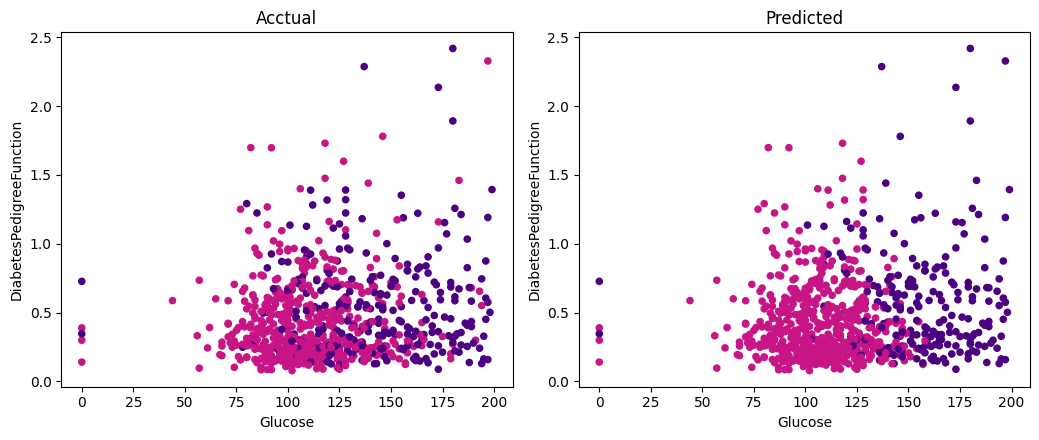

In [64]:
plt.rcParams["figure.figsize"] = [10.50, 4.50]
plt.rcParams["figure.autolayout"] = True
figure, axis = plt.subplots(1, 2)

colors = {0:'MEDIUMVIOLETRED', 1:'INDIGO'}

df_results.plot.scatter("Glucose","DiabetesPedigreeFunction",title="Acctual",ax=axis[0],c=df_results['Outcome'].map(colors))
df_results.plot.scatter("Glucose","DiabetesPedigreeFunction",title="Predicted",ax=axis[1],c=df_results['Y_pred'].map(colors))
